### Recreation of code, NN to retrive in water constituents



##### Initializing

In [18]:
#importerer bibliotek
import os 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

In [19]:
import pandas as pd
import os 
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Data fromating

In [21]:

print(os.getcwd())

# Load your dataset
data = pd.read_csv('..\\rrsalltest0.txt', index_col = False)  # Replace with your dataset path

# Assume 'features' are the columns used for prediction and 'target' is the algae concentration
# X = features = reflectance spectrum
# y = target = GT
X = [] #features
for i in range(60):
    value = 402.5+5*i
    X.append(str(value) + '_nm')
#y = data[' max_diatom_c']  # Target variable
#y = data[' max_flag_c']  # Target variable
y = data[' max_cdom_conc']  # Target variable


print(X)
reflectance_spectrum = data.values[:, 0: -3]
reflectance_spectrum = np.asarray(reflectance_spectrum).astype('float32')
reflectance_spectrum_log_trans = np.log10(reflectance_spectrum + 1e-6) ##log10 transformed reflectance spectrum, the natural algorithm 1e-6 = 0,000001
normalized_spectrum = ((reflectance_spectrum_log_trans - reflectance_spectrum_log_trans.min())/(reflectance_spectrum_log_trans.max()-reflectance_spectrum_log_trans.min()))
zero_centered_spectrum = normalized_spectrum - 0.5

y_transformed = np.asarray(y).astype('float32')
y_log_trans = np.log10(y_transformed + 1e-6)
y_normalized = ((y_log_trans - y_log_trans.min())/(y_log_trans.max()-y_log_trans.min()))
y_zero_centered = y_normalized - 0.5



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(zero_centered_spectrum, y_zero_centered, test_size=0.15, random_state=42) #70 train, 30 = split and val
#X_train, X_temp, y_train, y_temp = train_test_split(reflectance_spectrum, y, test_size=0.3, random_state=42) #70 train, 30 = split and val
#X_train, X_temp, y_train, y_temp = train_test_split(reflectance_spectrum_ln_trans, y, test_size=0.3, random_state=42) #w/ log transformed data
#X_train, X_temp, y_train, y_temp = train_test_split(normalized_spectrum, y, test_size=0.3, random_state=42) #w/ normalized and log10 
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42) # 15% split, 15% validation

print('\n')
print(reflectance_spectrum)
print('\n')
print(normalized_spectrum)
print(y)

C:\Users\amhs0\OneDrive\Documents\NTNU\9 sem\prosjketoppgave\Kode


C:\Users\amhs0\AppData\Local\Temp\ipykernel_27716\2250911761.py:4: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('..\\rrsalltest0.txt', index_col = False)  # Replace with your dataset path
C:\Users\amhs0\AppData\Local\Temp\ipykernel_27716\2250911761.py:4: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv('..\\rrsalltest0.txt', index_col = False)  # Replace with your dataset path


['402.5_nm', '407.5_nm', '412.5_nm', '417.5_nm', '422.5_nm', '427.5_nm', '432.5_nm', '437.5_nm', '442.5_nm', '447.5_nm', '452.5_nm', '457.5_nm', '462.5_nm', '467.5_nm', '472.5_nm', '477.5_nm', '482.5_nm', '487.5_nm', '492.5_nm', '497.5_nm', '502.5_nm', '507.5_nm', '512.5_nm', '517.5_nm', '522.5_nm', '527.5_nm', '532.5_nm', '537.5_nm', '542.5_nm', '547.5_nm', '552.5_nm', '557.5_nm', '562.5_nm', '567.5_nm', '572.5_nm', '577.5_nm', '582.5_nm', '587.5_nm', '592.5_nm', '597.5_nm', '602.5_nm', '607.5_nm', '612.5_nm', '617.5_nm', '622.5_nm', '627.5_nm', '632.5_nm', '637.5_nm', '642.5_nm', '647.5_nm', '652.5_nm', '657.5_nm', '662.5_nm', '667.5_nm', '672.5_nm', '677.5_nm', '682.5_nm', '687.5_nm', '692.5_nm', '697.5_nm']


[[0.001716  0.001835  0.001958  ... 0.0009786 0.0009195 0.000831 ]
 [0.00789   0.007876  0.00785   ... 0.003144  0.003088  0.002849 ]
 [0.00415   0.004283  0.004406  ... 0.002532  0.002461  0.002259 ]
 ...
 [0.001408  0.001494  0.001583  ... 0.003016  0.002975  0.002764 ]
 [0.

##### Making and training model

In [23]:
# Create a linear regression model
model = Sequential([ #linear model
    Input(shape=(60,)),
    Dense(60, activation = 'relu'), 
    Dense(60, activation = 'relu'), 
    Dense(60, activation = 'relu'), 
    Dense(1, activation = 'linear') # number here defines number of outputs = values to be estimated
])

model.compile(optimizer=Adam(), loss='mse', metrics = ['mae']) #adding Mae matric

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True) # early stopping if no imporovment after atccience = 10 epochs / iterations

model_fitted = model.fit(
    x = X_train,
    y = y_train,
    epochs = 100, #antall iterasjoner. Kristine kjører otginalt med 100 
    verbose = 2,
    #callbacks = [early_stopping],
    #validation_data = (X_val, y_val)
    validation_split = 0.1765
)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Epoch 1/100
7292/7292 - 9s - 1ms/step - loss: 0.0065 - mae: 0.0542 - val_loss: 0.0059 - val_mae: 0.0508
Epoch 2/100
7292/7292 - 8s - 1ms/step - loss: 0.0059 - mae: 0.0517 - val_loss: 0.0057 - val_mae: 0.0501
Epoch 3/100
7292/7292 - 8s - 1ms/step - loss: 0.0056 - mae: 0.0506 - val_loss: 0.0071 - val_mae: 0.0590
Epoch 4/100
7292/7292 - 8s - 1ms/step - loss: 0.0053 - mae: 0.0495 - val_loss: 0.0048 - val_mae: 0.0468
Epoch 5/100
7292/7292 - 8s - 1ms/step - loss: 0.0049 - mae: 0.0477 - val_loss: 0.0047 - val_mae: 0.0477
Epoch 6/100
7292/7292 - 8s - 1ms/step - loss: 0.0047 - mae: 0.0465 - val_loss: 0.0044 - val_mae: 0.0450
Epoch 7/100
7292/7292 - 8s - 1ms/step - loss: 0.0044 - mae: 0.0451 - val_loss: 0.0054 - val_mae: 0.0502
Epoch 8/100
7292/7292 - 8s - 1ms/step - loss: 0.0044 - mae: 0.0445 - val_loss: 0.0039 - val_mae: 0.0420
Epoch 9/100
7292/7292 - 8s - 1ms/step - loss: 0.0043 - mae: 0.0442 - val_loss: 0.0042 - val_mae: 0.0440
Epoch 10/100
7292/7292 - 8s - 1ms/step - loss: 0.0041 - mae: 0.0

##### plotting

C:\Users\amhs0\OneDrive\Documents\NTNU\9 sem\prosjketoppgave\Kode
Mean Squared Error: 0.004515719600021839
R-squared: 0.47177467151431063


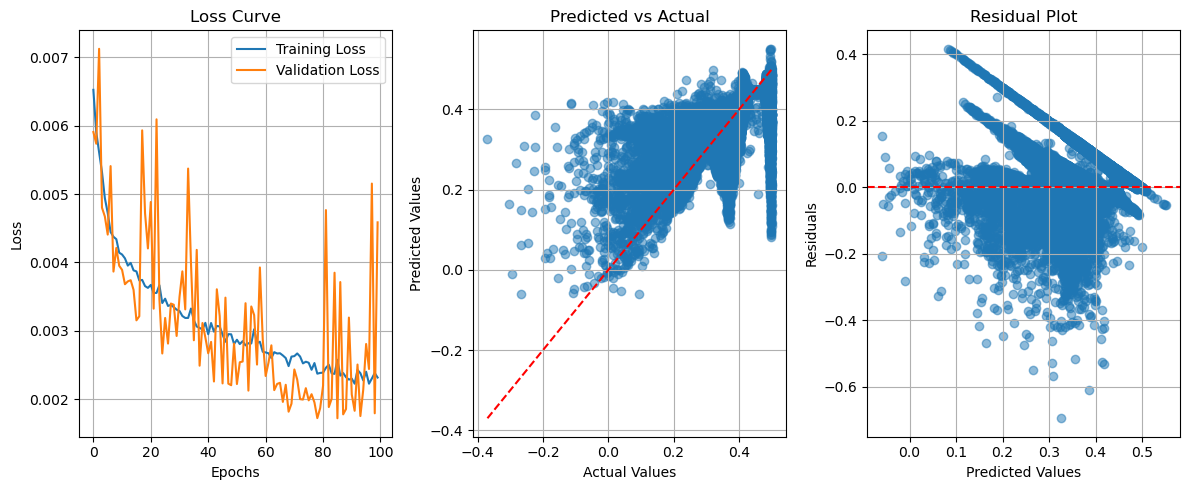

In [25]:
import matplotlib.pyplot as plt
import numpy as np

print(os.getcwd())

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Assuming model_fitted contains the training history
history = model_fitted.history

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Predicted vs Actual Values
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

# Flatten y_pred to ensure it is 1D
y_pred = y_pred.flatten()

# Residual Plot
plt.subplot(1, 3, 3)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

#save to comp
#plt.savefig('Plots\\NN_fromAss_100_norm_cdom.svg') #scalable vector graphics 
plt.savefig('Plots\\code_ass_data_Esmee_100e_gt_transformed.png') #scalable vector graphics 

plt.tight_layout()
plt.show()